In [52]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 73.1+ KB


In [54]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
median_ages = {}
median_ages['female'] = np.zeros(3)
median_ages['male'] = np.zeros(3)
for gender in median_ages:
    for pclass in range(3):
        median_ages[gender][pclass] = df[(df['Sex'] == gender) & (df['Pclass'] == pclass+1)]['Age'].median()
median_ages

{'female': array([ 35. ,  28. ,  21.5]), 'male': array([ 40.,  30.,  25.])}

In [56]:
df['AgeFill'] = df['Age']
for gender in median_ages:
    for pclass in range(3):
        df.loc[(df['Age'].isnull()) & (df['Pclass'] == pclass+1)\
               & (df['Sex'] == gender),\
               'AgeFill'] = median_ages[gender][pclass]
df.loc[df['Age'].isnull(), ['Age', 'AgeFill', 'Pclass', 'Sex']].head(10)

,Age,AgeFill,Pclass,Sex
5,NaN,25.0,3,male
17,NaN,30.0,2,male
19,NaN,21.5,3,female
26,NaN,25.0,3,male
28,NaN,21.5,3,female
29,NaN,25.0,3,male
31,NaN,35.0,1,female
32,NaN,21.5,3,female
36,NaN,25.0,3,male
42,NaN,25.0,3,male


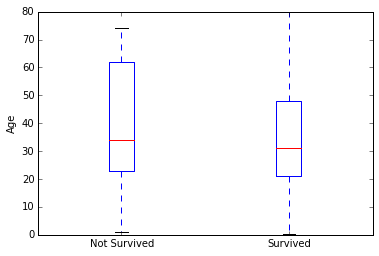

In [57]:
age_survived = df.loc[df.Survived == 1, 'Age']
age_died = df.loc[df.Survived == 0, 'Age']
data = [age_died, age_survived]
fig, ax = plt.subplots()
pos = np.array(range(len(data))) + 1
bp = ax.boxplot(data, sym='k+', positions=pos)

ax.set_ylabel('Age')
xtickNames = plt.setp(ax, xticklabels=['Not Survived', 'Survived'])
plt.setp(xtickNames, fontsize=10)
plt.show()

In [58]:
sex_count = np.array([df.loc[df.Sex == gender, 'Sex'].shape[0] for gender in ['female', 'male']])
sex_survived_count = np.array([df.loc[(df.Sex == gender) & (df.Survived == 1), 'Sex'].shape[0] for gender in ['female', 'male']])
print(sex_count, sex_survived_count)
print("Portion of survived vs Sex: ", sex_survived_count / sex_count)

[314 577] [233 109]
Portion of survived vs Sex:  [ 0.74203822  0.18890815]


In [59]:
# create age groups
df['AgeGroup'] = df['Age']
for i, age in enumerate(df['AgeGroup']):
    if np.isnan(age):
        df.loc[i, 'AgeGroup'] = 'Unknown'
    elif 0<= age <= 6:
        df.loc[i, 'AgeGroup'] = 'Younger than 6'
    elif 6 < age <= 15:
        df.loc[i, 'AgeGroup'] = '6 to 15'
    elif 15 < age <= 30:
        df.loc[i, 'AgeGroup'] = '15 to 30'
    elif 30 < age <= 40:
        df.loc[i, 'AgeGroup'] = '30 to 40'
    elif 40 < age <= 50:
        df.loc[i, 'AgeGroup'] = '40 to 50'
    elif 50 < age <= 60:
        df.loc[i, 'AgeGroup'] = '50 to 60'
    else:
        df.loc[i, 'AgeGroup'] = 'Older than 60'

In [60]:
# To make the plot more clear
df['SurvivalStatus'] = df['Survived']
df.loc[df.Survived == 1, 'SurvivalStatus'] = 'Survived'
df.loc[df.Survived == 0, 'SurvivalStatus'] = 'Died'
# Deal with NA and makes port name more clear in the final plot
df['Embarked'] = df['Embarked'].fillna('Unknown')
df['Embarked'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton', 'Unknown': 'Unknown'})
# Make pclass value more human readable
df['Pclass'] = df['Pclass'].map({1: '1st class', 2: '2nd class', 3: '3rd class'})
# Column added to so that dimplejs can collect the number of people in each group from this column
df['Count'] = 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill,AgeGroup,SurvivalStatus,Count
0,1,0,3rd class,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southampton,22.0,15 to 30,Died,1
1,2,1,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,38.0,30 to 40,Survived,1
2,3,1,3rd class,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,26.0,15 to 30,Survived,1
3,4,1,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,35.0,30 to 40,Survived,1
4,5,0,3rd class,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southampton,35.0,30 to 40,Died,1
5,6,0,3rd class,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Queenstown,25.0,Unknown,Died,1
6,7,0,1st class,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,Southampton,54.0,50 to 60,Died,1
7,8,0,3rd class,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,Southampton,2.0,Younger than 6,Died,1
8,9,1,3rd class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,Southampton,27.0,15 to 30,Survived,1
9,10,1,2nd class,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,Cherbourg,14.0,6 to 15,Survived,1


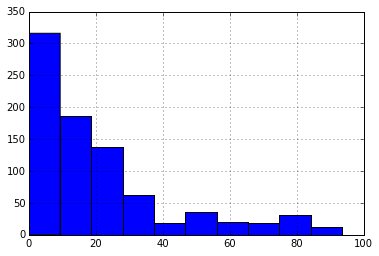

In [61]:
df[df['Fare'] <= 100]['Fare'].hist(bins=10)

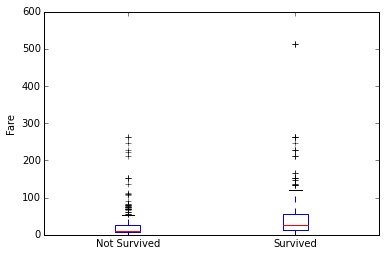

In [62]:
fare_survived = df.loc[df.Survived == 1, 'Fare']
fare_died = df.loc[df.Survived == 0, 'Fare']
data = [fare_died, fare_survived]
fig, ax = plt.subplots()
pos = np.array(range(len(data))) + 1
bp = ax.boxplot(data, sym='k+', positions=pos)

ax.set_ylabel('Fare')
xtickNames = plt.setp(ax, xticklabels=['Not Survived', 'Survived'])
plt.setp(xtickNames, fontsize=10)
plt.show()

In [63]:
# create fare groups
df['FareGroup'] = df['Fare']
for i, fare in enumerate(df['FareGroup']):
    if np.isnan(age):
        df.loc[i, 'FareGroup'] = 'Unknown'
    elif 0<= fare <= 10:
        df.loc[i, 'FareGroup'] = 'Less than 10'
    elif 10 < fare <= 20:
        df.loc[i, 'FareGroup'] = '10 to 20'
    elif 20 < fare <= 40:
        df.loc[i, 'FareGroup'] = '20 to 40'
    elif 40 < fare <= 100:
        df.loc[i, 'FareGroup'] = '40 to 100'
    else:
        df.loc[i, 'FareGroup'] = 'More than 100'

In [64]:
df.to_csv('data/titanic_modified.csv', index=False)